In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import random

## Step 1: Generating mandelbrot set

In [2]:
def mandelbrot(dx , nmax , xbounds=(-2.25 , 1), ybounds= (-1.5,1.5)):
    x1, x2 = xbounds
    y1, y2 = ybounds
    xs = np.arange(x1, x2 + dx, dx)
    ys = np.arange(y1, y2 + dx, dx)
    coordinates = [(x,y) for x in xs for y in ys]
    mandelbrot = []
  
    for coordinate in coordinates:
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        term = (c.real, c.imag , height) 
        mandelbrot.append(term)

    return np.array(mandelbrot)

    

 #### Visualizing

-1.25
{'(-2-1.25j)': 1.0, '(-2-1.24j)': 1.0, '(-2-1.23j)': 1.0, '(-2-1.22j)': 1.0, '(-2-1.21j)': 1.0, '(-2-1.2j)': 1.0, '(-2-1.19j)': 1.0, '(-2-1.18j)': 1.0, '(-2-1.17j)': 1.0, '(-2-1.16j)': 1.0, '(-2-1.15j)': 1.0, '(-2-1.14j)': 1.0, '(-2-1.13j)': 1.0, '(-2-1.1199999999999999j)': 1.0, '(-2-1.1099999999999999j)': 1.0, '(-2-1.0999999999999999j)': 1.0, '(-2-1.0899999999999999j)': 1.0, '(-2-1.0799999999999998j)': 1.0, '(-2-1.0699999999999998j)': 1.0, '(-2-1.0599999999999998j)': 1.0, '(-2-1.0499999999999998j)': 1.0, '(-2-1.0399999999999998j)': 1.0, '(-2-1.0299999999999998j)': 1.0, '(-2-1.0199999999999998j)': 1.0, '(-2-1.0099999999999998j)': 1.0, '(-2-0.9999999999999998j)': 1.0, '(-2-0.9899999999999998j)': 1.0, '(-2-0.9799999999999998j)': 1.0, '(-2-0.9699999999999998j)': 1.0, '(-2-0.9599999999999997j)': 1.0, '(-2-0.9499999999999997j)': 1.0, '(-2-0.9399999999999997j)': 1.0, '(-2-0.9299999999999997j)': 1.0, '(-2-0.9199999999999997j)': 1.0, '(-2-0.9099999999999997j)': 1.0, '(-2-0.89999999999999

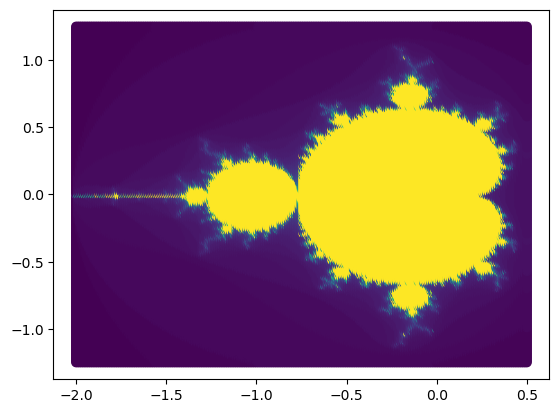

In [10]:

dx = 0.01
xrange = (-2, 0.5)
yrange = (-1.25,1.25)
nmax = 100


#sety = mandelbrot( dx=dx ,nmax = nmax)
sety = mandelbrot(dx ,nmax, xrange, yrange)

x, y , c = sety[:, 0], sety[:, 1], sety[:,2]

mandelbrot_dictionary = {}

#Adding the complex numbers and their heights to this dictionary
for i in range(50):
    complex_number = complex(x[i],y[i])
    mandelbrot_dictionary[str(complex_number)] = c[i]
    #print(complex_number)
    #print(mandelbrot_dictionary)
print(y[0])

print(mandelbrot_dictionary)


plt.scatter(x,y, c=c)


In [10]:
#numeber = complex()
print(x[1], y[1])
#print(mandelbrot_dictionary[(-2.0,1.24)])

-2.0 -1.25


KeyError: (-2.0, 1.24)

In [5]:
def MonteCarlo(iterations, sample, xlen, ylen):
    Data = mandelbrot(dx ,iterations, xrange, yrange)
    counter = 0
    Random_Point = random.choices(list(Data[:,2]), k = sample) # changed it to choices since we are considering uniform
        # distribution meaning every point is equally likely to be pulled. If we take random.sample it implies the likelihood
        # of the points being chosen increases after each iteration (I think at least). For not specified weights, this 
        # function chooses each number with equal probability --> uniformly distributed
    for s in range(sample):
        if Random_Point[s] >= iterations:
            counter = counter + 1
    A_m = (counter / sample) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m

Area = MonteCarlo(1000, 10000, xrange, yrange)
print(Area)


1.4874999999999998


In [6]:
sample_size = 100000
iteration_max = 100
Res = np.empty((iteration_max, 1))

def Convergence(iteration_max, sample_size, xrange, yrange):
    Res = np.empty((iteration_max, 1))
    for i in range(iteration_max):
        Data_final = MonteCarlo(iteration_max, sample_size, xrange, yrange)
        Integral_var = MonteCarlo(i, sample_size, xrange, yrange)
        Res[i] = Integral_var - Data_final
    return Res

Result = Convergence(iteration_max, sample_size, xrange, yrange)
plt.figure(dpi=300)
plt.plot(Result, color = 'purple', linewidth = '0.8')
plt.xlabel('Iterations')
plt.ylabel(r'$A_{j,s}-A_{100,s}$')
plt.show()
plt.close()



KeyboardInterrupt: 

In [5]:
#Latin hypercube sampling

dx = 0.01
xrange = (-2, 0.5)
yrange = (-1.25,1.25)
nmax = 10

#sety = mandelbrot( dx=dx ,nmax = nmax)
sety = mandelbrot(dx ,nmax, xrange, yrange)

def intervals(arr): #Returns a list of tuples for each interval of a list

    intervals = [] # A list of tuples containing each interval for the given range

    for i in range(len(arr)):
        j = i +1
        if(j < len(arr)):
            interval = (arr[i],arr[j])
            intervals.append(interval)

    return intervals  

def create_matrix(mandelbrot_data):
    #Stores the points on the grid as a 4x4 matrix

    xrange = (-2, 0.5)
    yrange = (-1.25,1.25)

    xintervals = np.linspace(-2,0.5,5)
    
    yintervals = np.linspace(-1.25,1.25,5)
    

    x_intervals_list = intervals(xintervals) #A list in which each element is one of the intervals in the x range

    y_intervals_list = intervals(yintervals) #A list in which each element is one of the intervals in the y range

    matrix = [[[] for _ in range(4)] for _ in range(4)] #Create 4x4 matrix such that each element of the matrix is an array

    



#create_matrix([0,0,0])

matrix = [[[] for _ in range(4)] for _ in range(4)]

#print(matrix)

matrix[0][1].append(5)    
print(matrix)

xintervals = np.linspace(-2,0.5,5)
    
yintervals = np.linspace(-1.25,1.25,5)
    
x_intervals_list = intervals(xintervals) #A list in which each element is one of the intervals in the x range
print(x_intervals_list)
y_intervals_list = intervals(yintervals)
print(y_intervals_list)

test_list = [-1.5,-2,-1.6]

for i in range(len(test_list)):

    for j in range(x_intervals_list):
        
        interval = x_intervals_list[j]

        if(interval[0] <= test_list[i] <= interval[1]):

            matrix[j][j].append(test_list[i])
        else:
            print("false")

print("FILLED MATRIX")
print(matrix)


[[[], [5], [], []], [[], [], [], []], [[], [], [], []], [[], [], [], []]]
[(-2.0, -1.375), (-1.375, -0.75), (-0.75, -0.125), (-0.125, 0.5)]
[(-1.25, -0.625), (-0.625, 0.0), (0.0, 0.625), (0.625, 1.25)]


TypeError: 'list' object cannot be interpreted as an integer

In [4]:
#New implentation
    
def intervals(arr): #Returns a list of tuples for each interval of a list

    intervals = [] # A list of tuples containing each interval for the given range      
    for i in range(len(arr)):
        j = i +1
        if(j < len(arr)):
            interval = (arr[i],arr[j])
            intervals.append(interval)

    return intervals  

      
def shuffler(x,y): #Shuffles the position of the x and y intervals in their respective lists
 
      
      shuffled_x_intervals = random.sample(x, len(x))
      shuffled_y_intervals = random.sample(y, len(y))

      return[shuffled_x_intervals,shuffled_y_intervals]


def latin_hypercube_sample(n): #Returns a list of randomly sampled n complex numbers from each row of the grid


        xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
    
        yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

        x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

        y_intervals_list = intervals(yrange) #A list in which each element is one of the intervals in the y range
        
        #print("X INTERVALS")
        #print(x_intervals_list)
        ##print("Y INTERVALS")
        #print(y_intervals_list)
        
        shuffled_x_intervals, shuffled_y_intervals  = shuffler(x_intervals_list,y_intervals_list) #Shuffling the intervals of both lists
        
        random_x_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled x intervals
        random_y_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled y intervals

        for interval in shuffled_x_intervals:
                
                random_x = random.uniform(interval[0],interval[1])
                random_x_list.append(random_x)


        for interval in shuffled_y_intervals:

                random_y = random.uniform(interval[0],interval[1])
                random_y_list.append(random_y)

        
        coordinates = list(zip(random_x_list, random_y_list))  
        

        random_complex_numbers = []

        for coordinate in coordinates:
                c = complex(coordinate[0], coordinate[1])
                random_complex_numbers.append(c)


        return[random_complex_numbers]



In [28]:

#GET HEIGHTS
latin_list = latin_hypercube_sample(1000)

#print(len(mandelbrot_dictionary))
#print(mandelbrot_dictionary['(-2-1.25j)'])

heights = []

for number in latin_list[0]:
        c = number
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        heights.append(height)
        


In [29]:
#Calculate new Area
counter = 0
for height in heights:
    Random_Point = height
    if Random_Point >= 100:
            counter = counter + 1
A_m = (counter / len(heights)) * (2.5) * 2.5
print(A_m)
#Area = MonteCarlo(1000, 10000, xrange, yrange)
#print(Area)


1.4749999999999999


In [30]:
#Orthogonal
xrange = np.linspace(-2,0.5,5) #x range in grid, with step n+1
    
yrange = np.linspace(-1.25,1.25,5) #y range in grid, with step n+1

x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

y_intervals_list = intervals(yrange)

#midpoint = len(x_intervals_list)/2 #Both x and y lists have the same length, and hence the same mid point
#print(midpoint)
#x_halves = [[x_intervals_list[:2]]]

#print(x_halves)


#sliced_x = np.array_split(x_intervals_list,2)

print(x_intervals_list)
print(y_intervals_list)
#print(y_intervals_list)

[(-2.0, -1.375), (-1.375, -0.75), (-0.75, -0.125), (-0.125, 0.5)]
[(-1.25, -0.625), (-0.625, 0.0), (0.0, 0.625), (0.625, 1.25)]
